In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt


In [3]:
def load_images(file_path):
    with open(file_path, 'rb') as f:
        magic = int.from_bytes(f.read(4), 'big')
        num_images = int.from_bytes(f.read(4), 'big')
        rows = int.from_bytes(f.read(4), 'big')
        cols = int.from_bytes(f.read(4), 'big')

        images = np.frombuffer(f.read(), dtype=np.uint8)
        images = images.reshape(num_images, rows, cols)

    return images


def load_labels(file_path):
    with open(file_path, 'rb') as f:
        magic = int.from_bytes(f.read(4), 'big')
        num_labels = int.from_bytes(f.read(4), 'big')

        labels = np.frombuffer(f.read(), dtype=np.uint8)

    return labels


In [4]:
base_path = "/content/drive/MyDrive/mnistdata/"

X_train = load_images(base_path + "train-images.idx3-ubyte")
y_train = load_labels(base_path + "train-labels.idx1-ubyte")

X_test = load_images(base_path + "t10k-images.idx3-ubyte")
y_test = load_labels(base_path + "t10k-labels.idx1-ubyte")


In [5]:
print("Training images shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test images shape:", X_test.shape)
print("Test labels shape:", y_test.shape)


Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


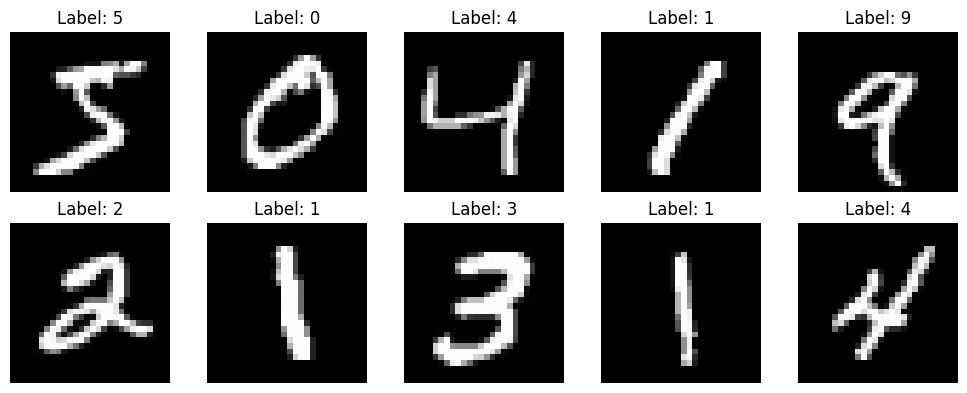

In [6]:
plt.figure(figsize=(10,4))

for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [7]:
# Normalize images
X_train_norm = X_train / 255.0
X_test_norm = X_test / 255.0


In [8]:
# Flatten images: 28x28 → 784
X_train_flat = X_train_norm.reshape(X_train_norm.shape[0], -1)
X_test_flat = X_test_norm.reshape(X_test_norm.shape[0], -1)

print("Flattened train shape:", X_train_flat.shape)
print("Flattened test shape:", X_test_flat.shape)


Flattened train shape: (60000, 784)
Flattened test shape: (10000, 784)


In [9]:
# Reshape for CNN (add channel dimension)
X_train_cnn = X_train_norm.reshape(-1, 28, 28, 1)
X_test_cnn = X_test_norm.reshape(-1, 28, 28, 1)

print("CNN train shape:", X_train_cnn.shape)
print("CNN test shape:", X_test_cnn.shape)


CNN train shape: (60000, 28, 28, 1)
CNN test shape: (10000, 28, 28, 1)


In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import time


In [11]:
k = 3
knn = KNeighborsClassifier(n_neighbors=k)

start_time = time.time()
knn.fit(X_train_flat, y_train)
train_time = time.time() - start_time


In [12]:
start_time = time.time()
y_pred_knn = knn.predict(X_test_flat)
test_time = time.time() - start_time

knn_accuracy = accuracy_score(y_test, y_pred_knn)

print(f"kNN Accuracy (k={k}): {knn_accuracy:.4f}")
print(f"Training Time: {train_time:.2f} seconds")
print(f"Prediction Time: {test_time:.2f} seconds")


kNN Accuracy (k=3): 0.9705
Training Time: 0.14 seconds
Prediction Time: 59.47 seconds


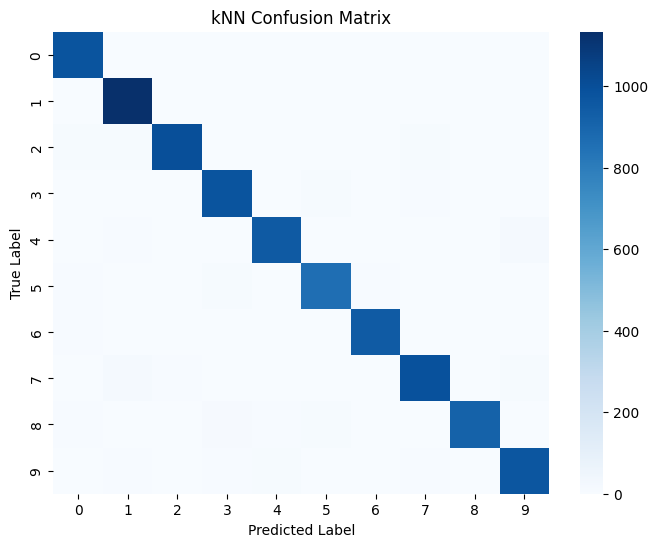

In [15]:
import seaborn as sns

cm = confusion_matrix(y_test, y_pred_knn)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=False, cmap="Blues")
plt.title("kNN Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [16]:
results = {
    "Model": ["kNN"],
    "Accuracy": [knn_accuracy],
    "Train Time (s)": [train_time],
    "Test Time (s)": [test_time]
}


In [17]:
from sklearn.svm import SVC


In [18]:
svm = SVC(kernel='linear')

start_time = time.time()
svm.fit(X_train_flat, y_train)
svm_train_time = time.time() - start_time


In [19]:
start_time = time.time()
y_pred_svm = svm.predict(X_test_flat)
svm_test_time = time.time() - start_time

svm_accuracy = accuracy_score(y_test, y_pred_svm)

print(f"SVM Accuracy: {svm_accuracy:.4f}")
print(f"Training Time: {svm_train_time:.2f} seconds")
print(f"Prediction Time: {svm_test_time:.2f} seconds")


SVM Accuracy: 0.9404
Training Time: 361.11 seconds
Prediction Time: 68.19 seconds


In [20]:
results["Model"].append("SVM")
results["Accuracy"].append(svm_accuracy)
results["Train Time (s)"].append(svm_train_time)
results["Test Time (s)"].append(svm_test_time)


In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical


In [22]:
y_train_oh = to_categorical(y_train, 10)
y_test_oh = to_categorical(y_test, 10)


In [23]:
mlp = Sequential([
    Dense(256, activation='relu', input_shape=(784,)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

mlp.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

mlp.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
start_time = time.time()

history = mlp.fit(
    X_train_flat,
    y_train_oh,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

mlp_train_time = time.time() - start_time


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 15ms/step - accuracy: 0.8471 - loss: 0.5312 - val_accuracy: 0.9663 - val_loss: 0.1140
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9650 - loss: 0.1180 - val_accuracy: 0.9758 - val_loss: 0.0866
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.9785 - loss: 0.0738 - val_accuracy: 0.9778 - val_loss: 0.0753
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 20ms/step - accuracy: 0.9842 - loss: 0.0516 - val_accuracy: 0.9777 - val_loss: 0.0735
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9888 - loss: 0.0370 - val_accuracy: 0.9797 - val_loss: 0.0755
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9915 - loss: 0.0267 - val_accuracy: 0.9788 - val_loss: 0.0730
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9936 - loss: 0.0206 - val_accuracy: 0.9795 - val_loss: 0.0755
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9937 - loss: 0.0188 - val_accur

In [25]:
start_time = time.time()
mlp_loss, mlp_accuracy = mlp.evaluate(X_test_flat, y_test_oh, verbose=0)
mlp_test_time = time.time() - start_time

print(f"MLP Accuracy: {mlp_accuracy:.4f}")
print(f"Training Time: {mlp_train_time:.2f} seconds")
print(f"Prediction Time: {mlp_test_time:.2f} seconds")


MLP Accuracy: 0.9776
Training Time: 57.69 seconds
Prediction Time: 1.03 seconds


In [26]:
results["Model"].append("MLP")
results["Accuracy"].append(mlp_accuracy)
results["Train Time (s)"].append(mlp_train_time)
results["Test Time (s)"].append(mlp_test_time)


In [27]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dropout


In [28]:
cnn = Sequential([
    Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),

    Conv2D(64, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

cnn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

cnn.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
start_time = time.time()

history_cnn = cnn.fit(
    X_train_cnn,
    y_train_oh,
    epochs=10,
    batch_size=128,
    validation_split=0.1,
    verbose=1
)

cnn_train_time = time.time() - start_time


Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 54s 122ms/step - accuracy: 0.7928 - loss: 0.6560 - val_accuracy: 0.9793 - val_loss: 0.0693
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 76s 108ms/step - accuracy: 0.9638 - loss: 0.1246 - val_accuracy: 0.9828 - val_loss: 0.0564
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 48s 114ms/step - accuracy: 0.9739 - loss: 0.0854 - val_accuracy: 0.9872 - val_loss: 0.0420
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 78s 106ms/step - accuracy: 0.9795 - loss: 0.0692 - val_accuracy: 0.9895 - val_loss: 0.0398
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 105ms/step - accuracy: 0.9819 - loss: 0.0593 - val_accuracy: 0.9892 - val_loss: 0.0373
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 105ms/step - accuracy: 0.9836 - loss: 0.0533 - val_accuracy: 0.9913 - val_loss: 0.0328
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 105ms/step - accuracy: 0.9876 - loss: 0.0417 - val_accuracy: 0.9908 - val_loss: 0.0340
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 44s 105ms/step - accuracy: 0.9887 - loss: 0

In [30]:
start_time = time.time()
cnn_loss, cnn_accuracy = cnn.evaluate(X_test_cnn, y_test_oh, verbose=0)
cnn_test_time = time.time() - start_time

print(f"CNN Accuracy: {cnn_accuracy:.4f}")
print(f"Training Time: {cnn_train_time:.2f} seconds")
print(f"Prediction Time: {cnn_test_time:.2f} seconds")


CNN Accuracy: 0.9916
Training Time: 600.36 seconds
Prediction Time: 5.28 seconds


In [31]:
results["Model"].append("CNN")
results["Accuracy"].append(cnn_accuracy)
results["Train Time (s)"].append(cnn_train_time)
results["Test Time (s)"].append(cnn_test_time)


In [32]:

results = {
    "Model": ["kNN", "SVM", "MLP", "CNN"],
    "Accuracy": [0.9705, 0.9404, 0.9776, 0.9916],
    "Train Time (s)": [0.14, 361.11, 57.69, 600.36],
    "Test Time (s)": [59.47, 68.19, 1.03, 5.28]
}


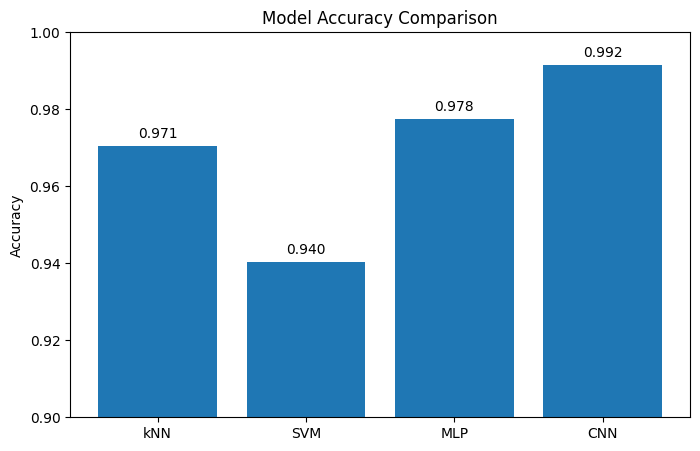

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.bar(results["Model"], results["Accuracy"])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.9, 1.0)

for i, acc in enumerate(results["Accuracy"]):
    plt.text(i, acc + 0.002, f"{acc:.3f}", ha='center')

plt.show()


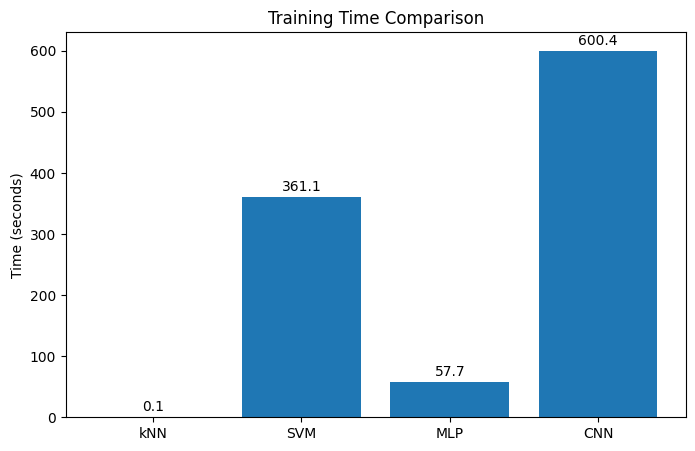

In [34]:
plt.figure(figsize=(8,5))
plt.bar(results["Model"], results["Train Time (s)"])
plt.title("Training Time Comparison")
plt.ylabel("Time (seconds)")

for i, t in enumerate(results["Train Time (s)"]):
    plt.text(i, t + 10, f"{t:.1f}", ha='center')

plt.show()


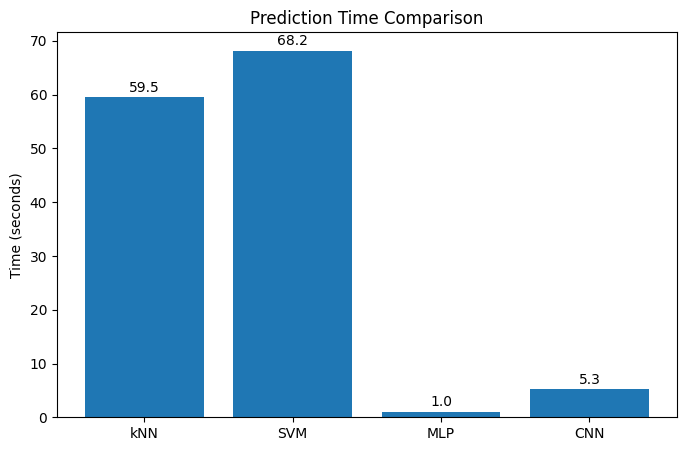

In [35]:
plt.figure(figsize=(8,5))
plt.bar(results["Model"], results["Test Time (s)"])
plt.title("Prediction Time Comparison")
plt.ylabel("Time (seconds)")

for i, t in enumerate(results["Test Time (s)"]):
    plt.text(i, t + 1, f"{t:.1f}", ha='center')

plt.show()


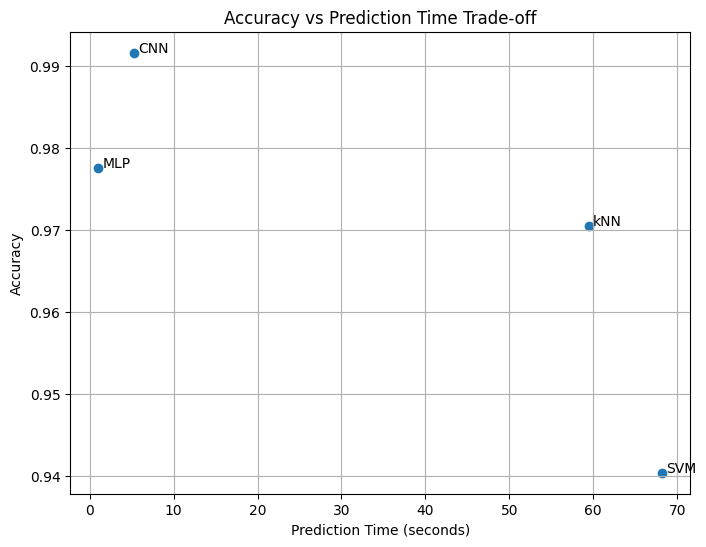

In [36]:
plt.figure(figsize=(8,6))

plt.scatter(
    results["Test Time (s)"],
    results["Accuracy"]
)

for i, model in enumerate(results["Model"]):
    plt.text(
        results["Test Time (s)"][i] + 0.5,
        results["Accuracy"][i],
        model
    )

plt.xlabel("Prediction Time (seconds)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Prediction Time Trade-off")
plt.grid(True)
plt.show()
